## Liczba danych

In [1]:
DATA = 20

## Generowanie zbioru danych

In [2]:
import numpy as np

mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, DATA).T
assert class1_sample.shape == (3,DATA), "The matrix has not the dimensions 3xDATA"
print(class1_sample)

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, DATA).T
assert class2_sample.shape == (3,DATA), "The matrix has not the dimensions 3xDATA"
print(class2_sample)


[[ 0.05651861  0.48952295 -0.53710128  1.98626354  0.35243284 -0.29323326
   0.44719438  1.94461432  0.29714571  0.32180538 -0.61268441  0.52136755
  -0.72409513 -0.49615834 -0.67794882  0.17620966  1.99715217  0.25399596
  -1.59353645  2.026127  ]
 [ 1.44194044  1.30362745 -1.45895712  0.34682736  0.59432258 -0.41106909
   0.35318333  0.80685937 -0.27171146  0.44166912 -2.98928296  0.23481003
  -0.7527054   0.86909192  0.09701349 -0.43087635  0.31445689 -1.54233968
   1.15924122  0.15512329]
 [-1.47686301 -0.2866229  -0.45469527  1.35089727 -0.98005851  0.63403946
  -0.76890478  0.85089598  0.97678903 -0.03151896  0.75631426 -0.03433581
  -0.58746668 -1.65424342  0.59422271 -1.12212444 -1.14250787 -0.26316404
   1.37900381 -0.45512157]]
[[-0.94257594 -0.63296851  1.35271584 -0.99298993 -0.68345169  0.30970815
   1.75176706  0.42827054  0.7537997   0.1116114   4.363216   -0.17794786
   1.08225565  0.28936246  1.3340639  -0.06868925  0.99299933 -0.81539662
   1.81434429  0.33969379]
 [ 

## Wizualizacja wygenerowanego zbioru danych

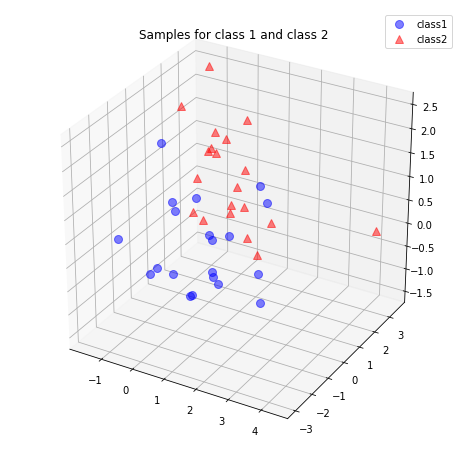

In [3]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10
ax.plot(class1_sample[0,:], class1_sample[1,:], class1_sample[2,:], 'o', markersize=8, color='blue', alpha=0.5, label='class1')
ax.plot(class2_sample[0,:], class2_sample[1,:], class2_sample[2,:], '^', markersize=8, alpha=0.5, color='red', label='class2')

plt.title('Samples for class 1 and class 2')
ax.legend(loc='upper right')

plt.show()

## 1. Połączenie zbiorów o różnych klasach

In [4]:
all_samples = np.concatenate((class1_sample, class2_sample), axis=1)
assert all_samples.shape == (3,40), "The matrix has not the dimensions 3x2*DATA"

## 2. Średnia wartość wektora (Mean Vector)

In [5]:
all_samples = np.concatenate((class1_sample, class2_sample), axis=1)

mean_x = np.mean(all_samples[0,:])
mean_y = np.mean(all_samples[1,:])
mean_z = np.mean(all_samples[2,:])

mean_vector = np.array([[mean_x],[mean_y],[mean_z]])

print('Mean Vector:')
print(mean_vector)

Mean Vector:
[[ 0.41363452]
 [ 0.7260748 ]
 [ 0.4023457 ]]


## 3. Macierz kowariancji (Covariance Matrix)

In [6]:
cov_mat = np.cov([all_samples[0,:],all_samples[1,:],all_samples[2,:]])

print('Covariance Matrix:')
print(cov_mat)

Covariance Matrix:
[[ 1.28948967  0.12782071 -0.16941403]
 [ 0.12782071  1.6072637   0.28254595]
 [-0.16941403  0.28254595  1.11816847]]


In [7]:
scatter_matrix = np.zeros((3,3))
for i in range(all_samples.shape[1]):
    scatter_matrix += (all_samples[:,i].reshape(3,1) - mean_vector).dot((all_samples[:,i].reshape(3,1) - mean_vector).T)
print('Scatter Matrix:')
print(scatter_matrix)

Scatter Matrix:
[[ 50.29009707   4.98500768  -6.60714707]
 [  4.98500768  62.68328444  11.01929213]
 [ -6.60714707  11.01929213  43.60857016]]


## 4. Wektor własny i wartość własna

In [8]:
eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)

print('Eigenvalues')
print(eig_val_cov)
print('Eigenvectors')
print(eig_vec_cov)

Eigenvalues
[ 0.88281118  1.39039985  1.74171081]
Eigenvectors
[[-0.45604924  0.88247297  0.11515443]
 [ 0.39206169  0.0830587   0.91618169]
 [-0.798941   -0.4629716   0.38386271]]


In [9]:
eig_val_sc, eig_vec_sc = np.linalg.eig(scatter_matrix)

print('Eigenvalues')
print(eig_val_sc)
print('Eigenvectors')
print(eig_vec_sc)

Eigenvalues
[ 34.42963609  54.22559408  67.9267215 ]
Eigenvectors
[[-0.45604924  0.88247297  0.11515443]
 [ 0.39206169  0.0830587   0.91618169]
 [-0.798941   -0.4629716   0.38386271]]


In [10]:
for i in range(len(eig_val_sc)):
    eigvec_sc = eig_vec_sc[:,i].reshape(1,3).T
    eigvec_cov = eig_vec_cov[:,i].reshape(1,3).T
    assert eigvec_sc.all() == eigvec_cov.all(), 'Eigenvectors are not identical'

    print('Eigenvector {}: \n{}'.format(i+1, eigvec_sc))
    print('Eigenvalue {} from scatter matrix: {}'.format(i+1, eig_val_sc[i]))
    print('Eigenvalue {} from covariance matrix: {}'.format(i+1, eig_val_cov[i]))
    print('Scaling factor: ', eig_val_sc[i]/eig_val_cov[i])
    print(40 * '-')

Eigenvector 1: 
[[-0.45604924]
 [ 0.39206169]
 [-0.798941  ]]
Eigenvalue 1 from scatter matrix: 34.42963608599665
Eigenvalue 1 from covariance matrix: 0.8828111816922228
Scaling factor:  39.0
----------------------------------------
Eigenvector 2: 
[[ 0.88247297]
 [ 0.0830587 ]
 [-0.4629716 ]]
Eigenvalue 2 from scatter matrix: 54.22559408266853
Eigenvalue 2 from covariance matrix: 1.390399848273552
Scaling factor:  39.0
----------------------------------------
Eigenvector 3: 
[[ 0.11515443]
 [ 0.91618169]
 [ 0.38386271]]
Eigenvalue 3 from scatter matrix: 67.92672150312663
Eigenvalue 3 from covariance matrix: 1.7417108077724774
Scaling factor:  39.0
----------------------------------------


## Wizualizacja wektora średniego w przestrzeni i wartości własnych

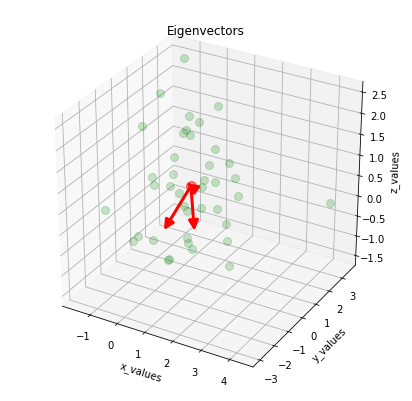

In [11]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch


class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(all_samples[0,:], all_samples[1,:], all_samples[2,:], 'o', markersize=8, color='green', alpha=0.2)
ax.plot([mean_x], [mean_y], [mean_z], 'o', markersize=10, color='red', alpha=0.5)
for v in eig_vec_sc.T:
    a = Arrow3D([mean_x, v[0]], [mean_y, v[1]], [mean_z, v[2]], mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
    ax.add_artist(a)
ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')

plt.title('Eigenvectors')

plt.show()

## 5.1 Sorotwanie wektorów własnych po wartościach własnych

In [12]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_val_cov[i]), eig_vec_cov[:,i]) for i in range(len(eig_val_cov))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
for i in eig_pairs:
    print(i[0])

1.74171080777
1.39039984827
0.882811181692


## 5.2 Wybranie k wektorów własnych

In [13]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(3,1), eig_pairs[1][1].reshape(3,1)))
print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.11515443  0.88247297]
 [ 0.91618169  0.0830587 ]
 [ 0.38386271 -0.4629716 ]]


## 6. Transformacja w nową przestrzeń k wymiarową

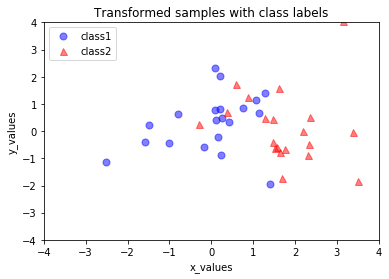

In [14]:
transformed = matrix_w.T.dot(all_samples)
assert transformed.shape == (2,2*DATA), "The matrix is not 2xDATA dimensional."

plt.plot(transformed[0,0:20], transformed[1,0:20], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(transformed[0,20:40], transformed[1,20:40], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples with class labels')

plt.show()

## Używając matplotlip.mlab

PC axes in terms of the measurement axes scaled by the standard deviations:
 [[-0.22706261  0.62529235  0.74662711]
 [ 0.84750836  0.50454655 -0.16481004]
 [-0.47976259  0.59535053 -0.64450415]]


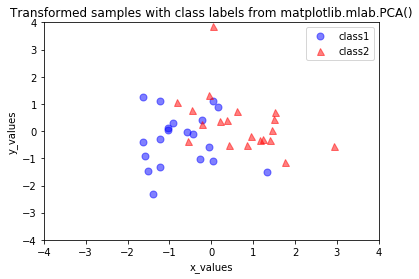

In [15]:
# https://matplotlib.org/api/mlab_api.html#matplotlib.mlab.PCA

from matplotlib.mlab import PCA as mlabPCA

mlab_pca = mlabPCA(all_samples.T)

print('PC axes in terms of the measurement axes scaled by the standard deviations:\n', mlab_pca.Wt)

plt.plot(mlab_pca.Y[0:20,0],mlab_pca.Y[0:20,1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(mlab_pca.Y[20:40,0], mlab_pca.Y[20:40,1], '^', markersize=7, color='red', alpha=0.5, label='class2')

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.legend()
plt.title('Transformed samples with class labels from matplotlib.mlab.PCA()')

plt.show()

## Używając sklearn

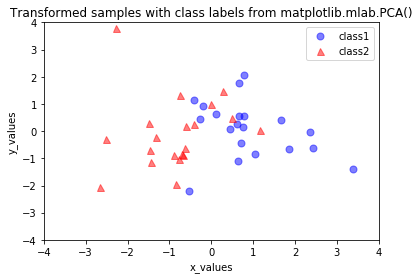

In [16]:
# http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

from sklearn.decomposition import PCA as sklearnPCA

sklearn_pca = sklearnPCA(n_components=2)
sklearn_transf = sklearn_pca.fit_transform(all_samples.T)

plt.plot(sklearn_transf[0:20,0],sklearn_transf[0:20,1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(sklearn_transf[20:40,0], sklearn_transf[20:40,1], '^', markersize=7, color='red', alpha=0.5, label='class2')

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.legend()
plt.title('Transformed samples with class labels from matplotlib.mlab.PCA()')

plt.show()